In [ ]:
import numpy  # for no. calculations
import matplotlib.pyplot as plt # for plotting the graph
from pandas import read_csv # for reading the csv file
import math
from keras.models import Sequential # using sequential model from keras
from keras.layers import Dense
from keras.layers import LSTM # lstm is a layer where we will compute the things in faster way
from sklearn.preprocessing import  MinMaxScaler # for preprocessing the data
from sklearn.metrics import mean_squared_error


In [ ]:
numpy.random.seed(4)
#load the dataset
dataframe = read_csv('grade.csv',usecols=[1],engine='python')
dataset=dataframe.values
dataset=dataset.astype('float32')

In [ ]:
def create_dataset(dataset,look_back=1):
  dataX, dataY=[],[]  # for plotting the graph between  x and y 
  for i in range(len(dataset)-look_back-1):
     a= dataset[i:(i+look_back),0]
     dataX.append(a)
     dataY.append(dataset[i+look_back,0])
  return numpy.array(dataX),numpy.array(dataY) # converting to numpy array 

In [ ]:
#normalize the dataset
scalar = MinMaxScaler(feature_range=(0,1))
dataset = scalar.fit_transform(dataset)
train_size=int(len(dataset)*0.70)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

#reshape into x=t and y=t+1
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY  = create_dataset(test, look_back)

#reshape input to be[sample,timesteps,features]

trainX =numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX= numpy.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

In [ ]:
model=Sequential()
model.add(LSTM(2,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1,verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.5086 - 1s/epoch - 720ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5075 - 5ms/epoch - 2ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5048 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5031 - 7ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5023 - 5ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4996 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4987 - 5ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4969 - 6ms/epoch - 3ms/step
Epoch 9/100
2/2 - 0s - loss: 0.4951 - 5ms/epoch - 3ms/step
Epoch 10/100
2/2 - 0s - loss: 0.4933 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.4908 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.4892 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.4875 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.4867 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.4841 - 5ms/epoch - 2ms/step
Epoch 16/100
2/2 - 0s - loss: 0.4825 - 8ms/epoch - 4ms/step
Epoch 17/100
2/2 - 0s - loss: 0.4809 - 9ms/epoc

In [ ]:
trainPredict= model.predict(trainX)
testPredict=model.predict(testX)
#invert prediction
trainPredict=scalar.inverse_transform(trainPredict)

trainY=scalar.inverse_transform([trainY])
testPredict=scalar.inverse_transform(testPredict)
testY=scalar.inverse_transform([testY]) 

Train Score: 0.59 RMSE
Test Score :0.85 RMSE


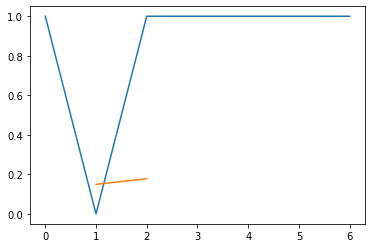

In [ ]:
trainScore= math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score :%.2f RMSE'% (testScore))
trainPredictPlot=numpy.empty_like(dataset)
trainPredictPlot[:,:]=numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

testPredicdtPlot=numpy.empty_like(dataset)
testPredicdtPlot[:,:]=numpy.nan
testPredicdtPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]=testPredict

plt.plot(scalar.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredicdtPlot)
plt.show()